## ALEXNET ARCHITECTURE

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow
import tensorflow as tf
print(tf.__version__)

import keras
import keras.backend as K
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, Conv3D, DepthwiseConv2D, SeparableConv2D, Conv3DTranspose
from keras.layers import Flatten, MaxPool2D, AvgPool2D, GlobalAvgPool2D, UpSampling2D, BatchNormalization
from keras.layers import Concatenate, Add, Dropout, ReLU, Lambda, Activation, LeakyReLU, PReLU



from time import time
import numpy as np

from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')


2.15.0


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,validation_split = 0.2)
train_data=train.flow_from_directory(directory = 'DATASET/TRAIN',target_size=(224,224),
                                     batch_size=32,class_mode='categorical')

Found 2002 images belonging to 20 classes.


In [4]:
test=ImageDataGenerator(rescale=1./255)
test_data=test.flow_from_directory(directory = 'DATASET/TEST',target_size=(224,224),
                                   batch_size=32,class_mode='categorical')

Found 2002 images belonging to 20 classes.


In [5]:
def alexnet(input_shape, n_classes):
  input = Input(input_shape)
  
  # actually batch normalization didn't exist back then
  # they used LRN (Local Response Normalization) for regularization
  x = Conv2D(96, 11, strides=4, padding='same', activation='relu')(input)
  x = BatchNormalization()(x)
  x = MaxPool2D(3, strides=2)(x)
  
  x = Conv2D(256, 5, padding='same', activation='relu')(x)
  x = BatchNormalization()(x)
  x = MaxPool2D(3, strides=2)(x)
  
  x = Conv2D(384, 3, strides=1, padding='same', activation='relu')(x)
  
  x = Conv2D(384, 3, strides=1, padding='same', activation='relu')(x)
  
  x = Conv2D(256, 3, strides=1, padding='same', activation='relu')(x)
  x = BatchNormalization()(x)
  x = MaxPool2D(3, strides=2)(x)
  
  x = Flatten()(x)
  x = Dense(4096, activation='relu')(x)
  x = Dense(4096, activation='relu')(x)
  
  output = Dense(n_classes, activation='softmax')(x)
  
  model = Model(input, output)
  model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy',tensorflow.keras.metrics.Precision()])
  return model

input_shape = 224, 224, 3
n_classes = 20

K.clear_session()
model = alexnet(input_shape, n_classes)
model.summary()          




Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 56, 56, 96)        34944     
                                                                 
 batch_normalization (Batch  (None, 56, 56, 96)        384       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 27, 27, 96)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 batch_normalization_1 (Bat  (None, 27, 27, 256)       102

In [6]:
model_path = "ALEXNET.h5"

from keras.callbacks import ModelCheckpoint

M = ModelCheckpoint(model_path, monitor='accuracy', verbose=1, save_best_only=True)

In [7]:
epochs = 50
batch_size = 512

In [8]:
#### Fitting the model
history = model.fit(
           train_data, steps_per_epoch=train_data.samples // batch_size, 
           epochs=epochs, 
           validation_data=test_data,validation_steps=test_data.samples // batch_size,
           callbacks=[M])

Epoch 1/50


3/3 [==============================] - ETA: 0s - loss: 40.1281 - accuracy: 0.0312 - precision: 0.0469       
Epoch 1: accuracy improved from -inf to 0.03125, saving model to ALEXNET.h5
3/3 [==============================] - 21s 8s/step - loss: 40.1281 - accuracy: 0.0312 - precision: 0.0469 - val_loss: 37.1223 - val_accuracy: 0.0417 - val_precision: 0.0417
Epoch 2/50
3/3 [==============================] - ETA: 0s - loss: 23.2103 - accuracy: 0.0938 - precision: 0.0959
Epoch 2: accuracy improved from 0.03125 to 0.09375, saving model to ALEXNET.h5
3/3 [==============================] - 20s 8s/step - loss: 23.2103 - accuracy: 0.0938 - precision: 0.0959 - val_loss: 32.2693 - val_accuracy: 0.1146 - val_precision: 0.1146
Epoch 3/50
3/3 [==============================] - ETA: 0s - loss: 9.0657 - accuracy: 0.0938 - precision: 0.1176 
Epoch 3: accuracy did not improve from 0.09375
3/3 [==============================] - 6s 2s/step - loss: 9.0657 - accuracy: 0.0938 - precision: 0.1176 

Epoch 49/50
3/3 [==============================] - ETA: 0s - loss: 1.3839 - accuracy: 0.2917 - precision: 0.0000e+00
Epoch 49: accuracy did not improve from 0.34375
3/3 [==============================] - 20s 7s/step - loss: 1.3839 - accuracy: 0.2917 - precision: 0.0000e+00 - val_loss: 1.3877 - val_accuracy: 0.2604 - val_precision: 0.0000e+00
Epoch 50/50
3/3 [==============================] - ETA: 0s - loss: 1.3861 - accuracy: 0.2500 - precision: 0.0000e+00
Epoch 50: accuracy did not improve from 0.34375
3/3 [==============================] - 21s 7s/step - loss: 1.3861 - accuracy: 0.2500 - precision: 0.0000e+00 - val_loss: 1.3888 - val_accuracy: 0.2396 - val_precision: 0.0000e+00


In [9]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'precision', 'val_loss', 'val_accuracy', 'val_precision'])

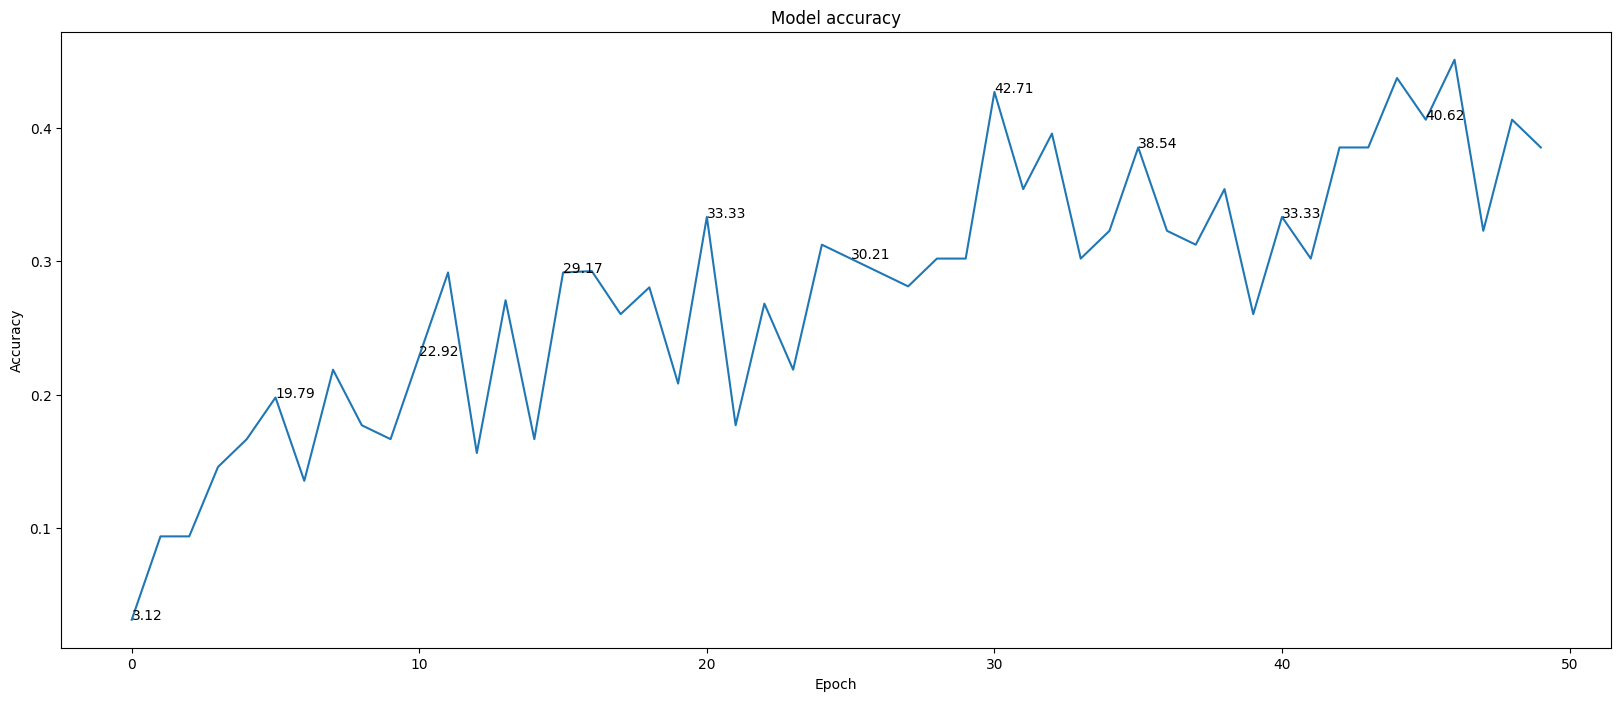

In [10]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20, 8))
plt.plot(history.history['accuracy'])

for i in range(epochs):
    if i%5 == 0:
        plt.annotate(np.round(history.history['accuracy'][i]*100,2),xy=(i,history.history['accuracy'][i]))

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

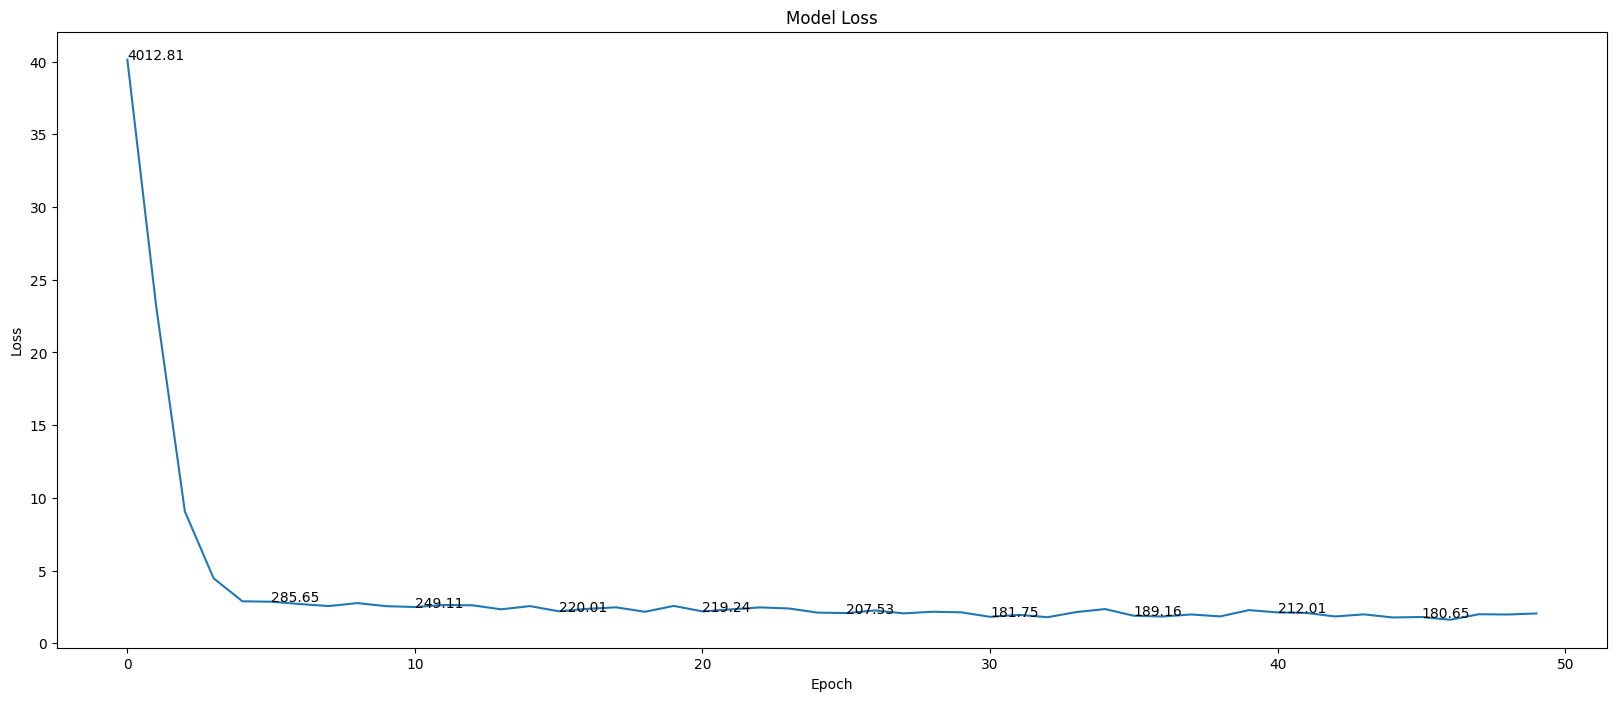

In [11]:
plt.figure(figsize=(20, 8))
plt.plot(history.history['loss'])

for i in range(epochs):
    if i%5 == 0:
        plt.annotate(np.round(history.history['loss'][i]*100,2),xy=(i,history.history['loss'][i]))

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()